# Train a SoTA Classifier on the Cleaned Dataset

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import accuracy

In [3]:
# # Uncomment if using a custom jupyter theme
# from jupyterthemes import jtplot
# jtplot.style(ticks=True)

In [4]:
# set up paths to working directory for convenient access
img_path = Path("C:/mask-detection")
model_path = Path("D:/Datasets/COVID-19-mask-detection/models")

In [5]:
def get_data(sz, bs=64):
    '''
    Helper function to return an ImageDataBunch.
    Parameters:
    sz: image size to use
    bs: batch size
    '''
    data = (ImageList.from_folder(img_path)
        .split_by_folder()
        .label_from_folder()
        .transform(get_transforms(max_zoom=1.2), size=sz)
        .databunch(bs=bs).normalize(imagenet_stats))
    return data

In [6]:
data = get_data(128, 64)

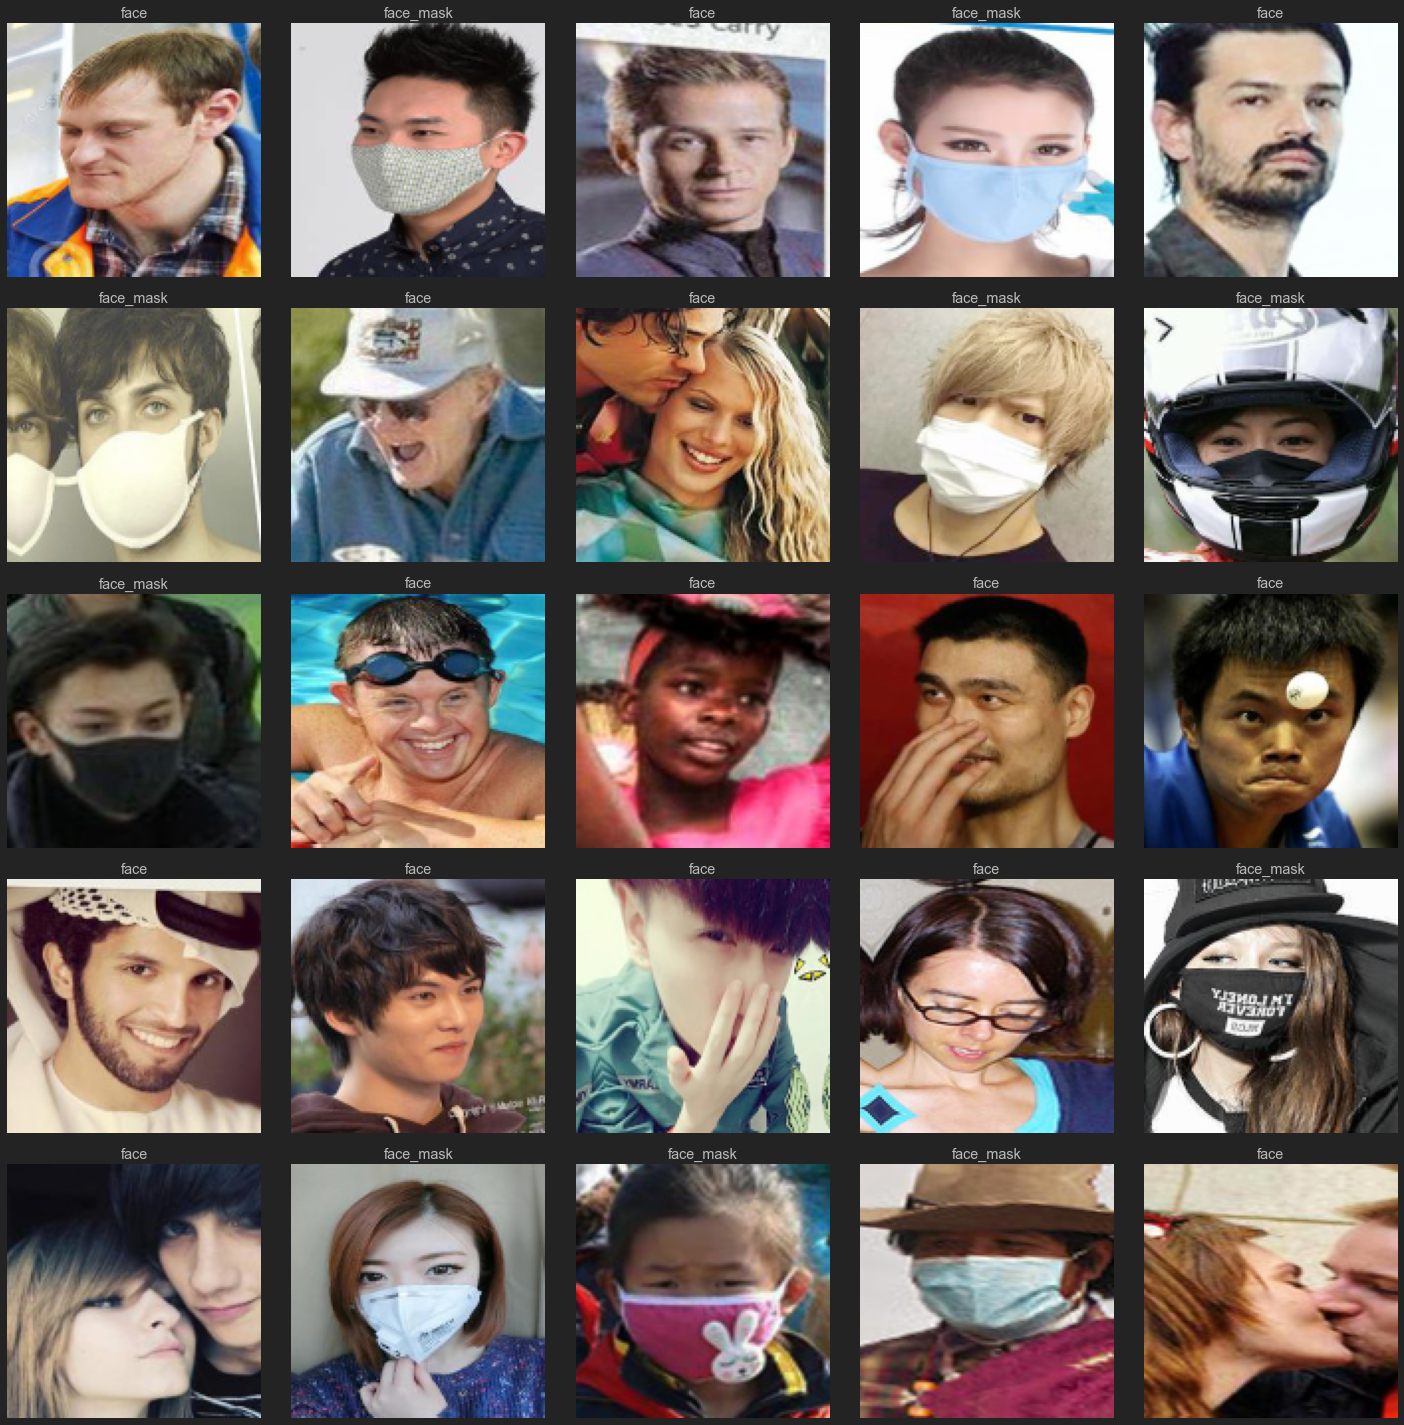

In [9]:
data.show_batch(ds_type=DatasetType.Train)

## Before data refactoring

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


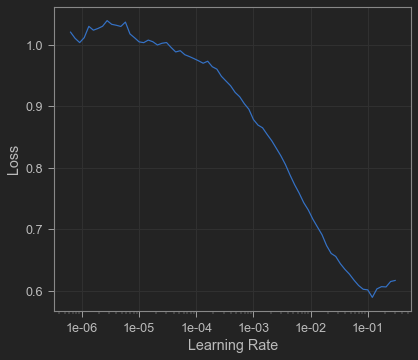

In [11]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(5, max_lr=1e-3, wd=0.1)

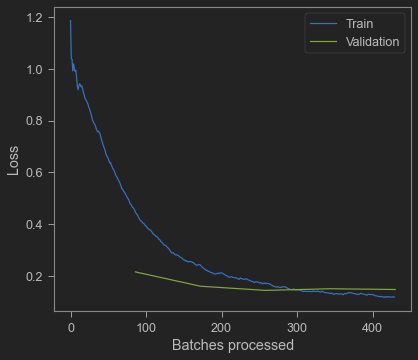

In [15]:
learn.recorder.plot_losses()

In [16]:
learn.save(model_path/"rn34-stage1")

In [17]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


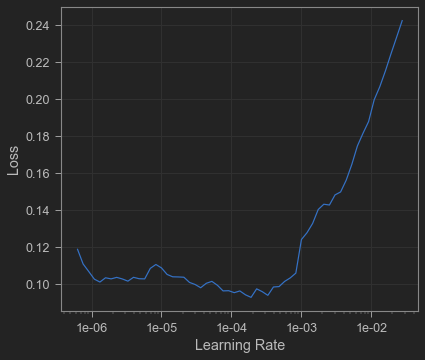

In [18]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(3, max_lr=slice(3e-6, 3e-4), wd=0.1)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

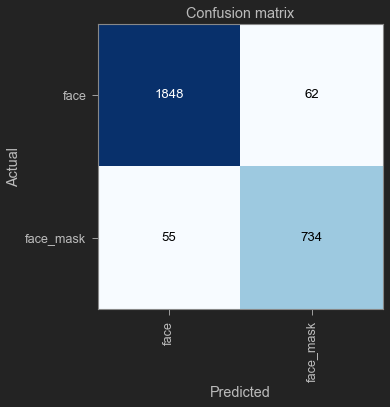

In [24]:
interp.plot_confusion_matrix()

In [25]:
torch.Tensor.ndim = property(lambda x: len(x.shape))

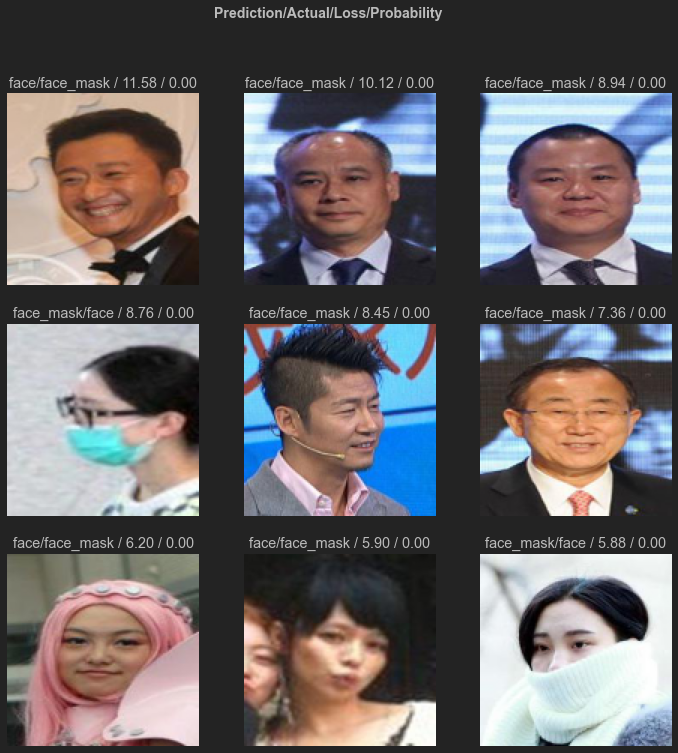

In [34]:
interp.plot_top_losses(9)

In [29]:
learn.save(model_path/"rn34-stage2")

In [33]:
learn.export(model_path/"export.pkl")

In [8]:
learn.load(model_path/"rn34-stage2");

## Post data refactoring

In [6]:
data = get_data(128, 64)

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy).load(model_path/"rn34-stage2");

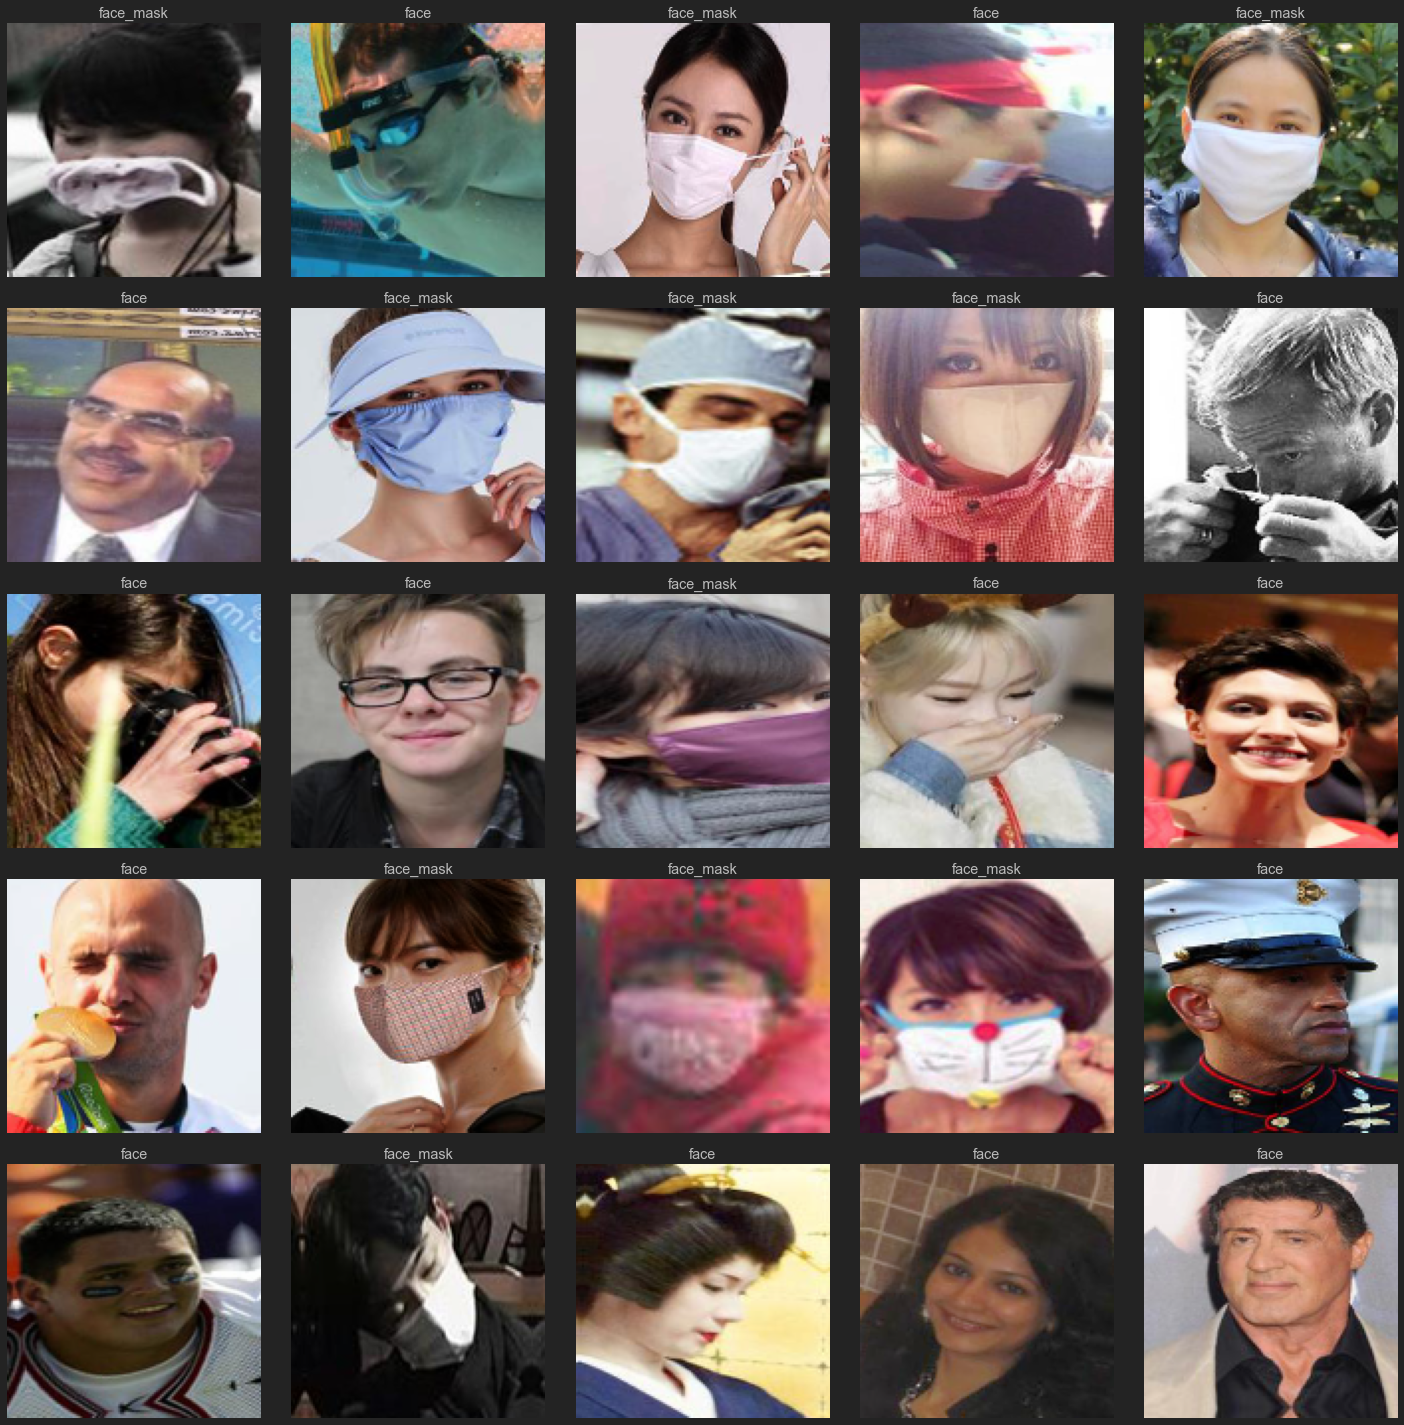

In [13]:
data.show_batch(ds_type=DatasetType.Train)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


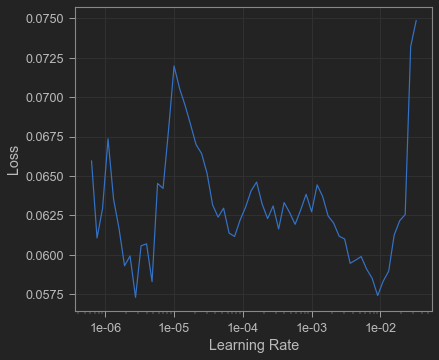

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


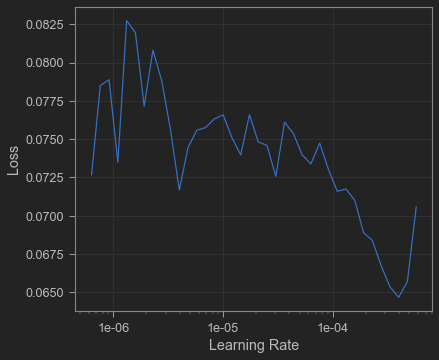

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(3, max_lr=slice(2e-6, 2e-4), wd=0.1)

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

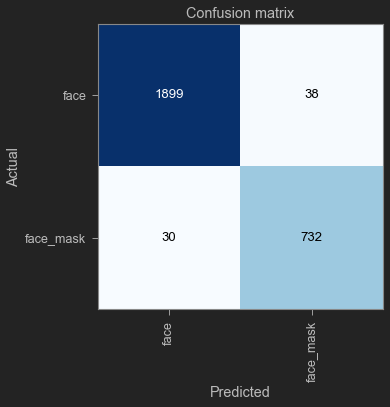

In [20]:
interp.plot_confusion_matrix()

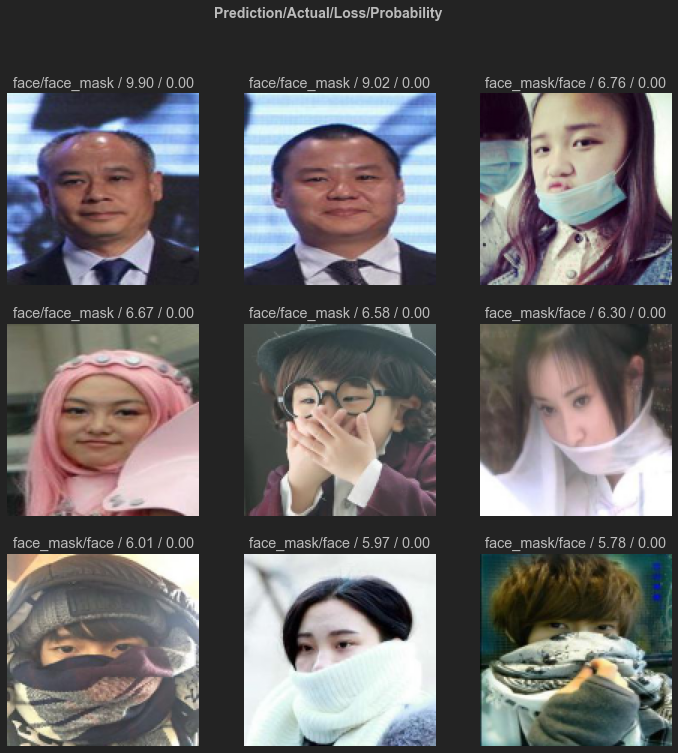

In [22]:
torch.Tensor.ndim = property(lambda x: len(x.shape))
interp.plot_top_losses(9)

In [23]:
learn.save(model_path/"rn34-stage3")

In [8]:
data = get_data(224, 32)

In [36]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy).load(model_path/"rn34-stage3");

In [37]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


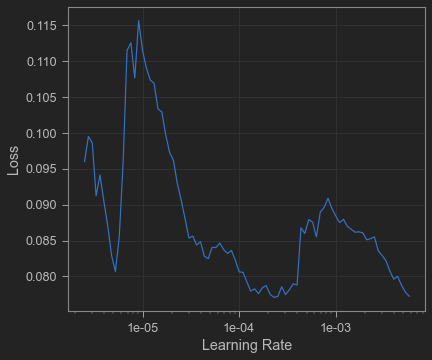

In [39]:
learn.lr_find(start_lr=1e-6, end_lr=1e-2, wd=0.1)
learn.recorder.plot()

In [40]:
learn.fit_one_cycle(3, max_lr=1e-4, wd=0.1)

In [43]:
learn.save(model_path/"rn34-stage4")

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy).load(model_path/"rn34-stage4");

In [10]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


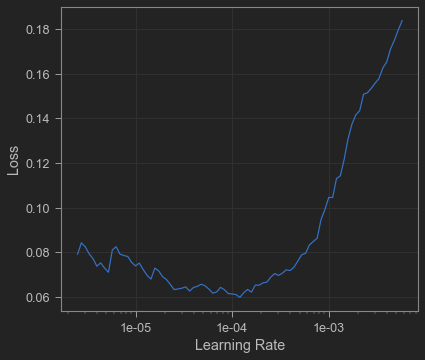

In [42]:
learn.lr_find(start_lr=1e-6, end_lr=1e-2, wd=0.1)
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(5, max_lr=slice(2e-7, 2e-5), wd=0.1)

In [12]:
learn.save(model_path/"rn34-stage5")

In [13]:
learn.fit_one_cycle(5, max_lr=slice(2e-7, 2e-5), wd=0.1)

In [6]:
data = get_data(224, 32)

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy).load(model_path/"rn34-stage6");

In [8]:
interp = ClassificationInterpretation.from_learner(learn)

## Results

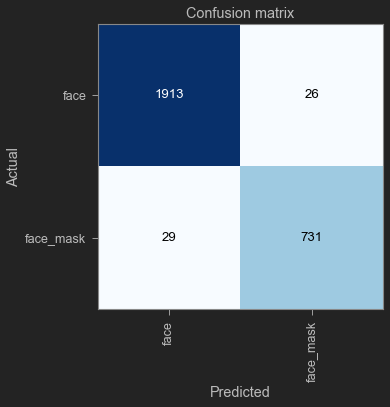

In [9]:
interp.plot_confusion_matrix()

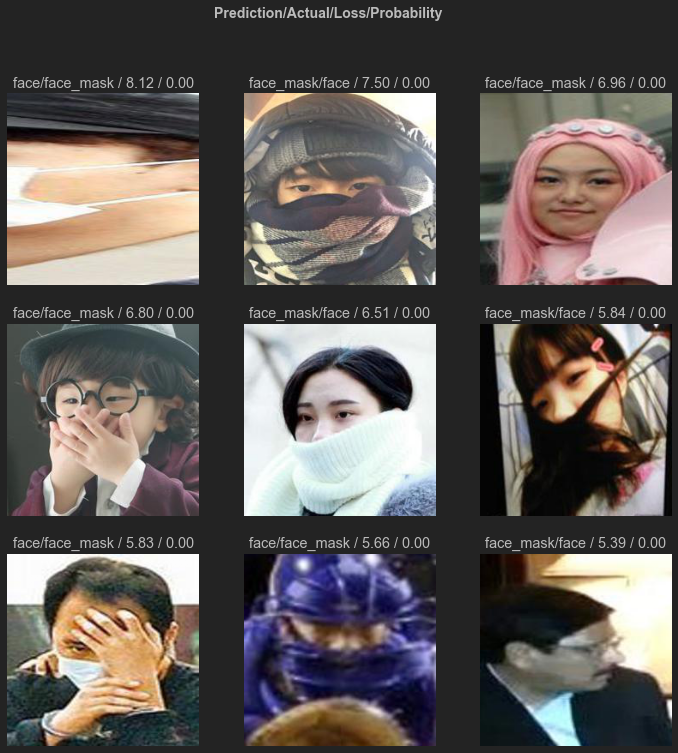

In [11]:
torch.Tensor.ndim = property(lambda x: len(x.shape))
interp.plot_top_losses(9)

## Export Model as Pickel File to contain all transform stats, etc

In [16]:
learn.export(model_path/"trained-resnet34.pkl")